[*********************100%***********************]  1 of 1 completed
e:\Anaconda\envs\Bilal-2.0\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2769/2769 ━━━━━━━━━━━━━━━━━━━━ 68s 24ms/step - loss: 0.0036
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


C:\Users\Dell\AppData\Local\Temp\ipykernel_1844\2992418907.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


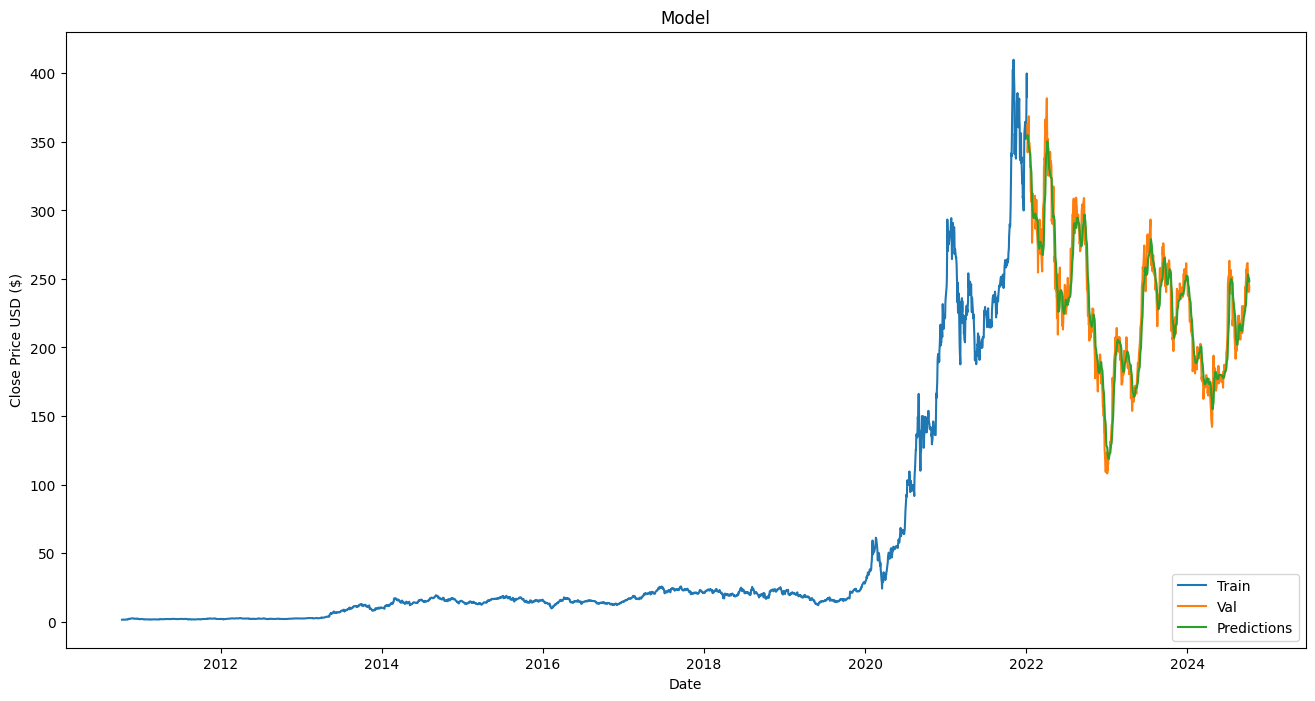

In [10]:
# Take stock price of any Tesla and predicts its price by using LSTM.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def load_data(company, start_date, end_date):
    data = yf.download(company, start=start_date, end=end_date)
    return data[['Close']]

def preprocess_data(data, seq_length):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    
    X, y = [], []
    for i in range(len(scaled_data) - seq_length):
        X.append(scaled_data[i:i + seq_length])
        y.append(scaled_data[i + seq_length])
    
    X, y = np.array(X), np.array(y)
    return X, y, scaler

def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def plot_results(train, valid, predictions):
    plt.figure(figsize=(16, 8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

def main():
    company = 'TSLA'  # Tesla Inc.
    start_date = '2010-10-10'
    end_date = '2024-10-10'
    seq_length = 60
    epochs = 1
    batch_size = 1

    # Load and preprocess data
    data = load_data(company, start_date, end_date)
    X, y, scaler = preprocess_data(data, seq_length)

    # Split data into training and testing sets
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Build and train the model
    model = build_model((seq_length, 1))
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    # Prepare data for plotting
    train = data[:split + seq_length]
    valid = data[split + seq_length:]
    valid['Predictions'] = predictions

    # Plot results
    plot_results(train, valid, predictions)

# Execute the main function
if __name__ == "__main__":
    main()